In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading and understanding the data

In [5]:
df = pd.read_csv(r'C:\Users\Parth Trivedi\Desktop\CODING\MachineLearning\FraudGuard-ML-FraudDetection\data\creditcard.csv\creditcard.csv')
print("shape  of the dataset=",df.shape)
df.head()

shape  of the dataset= (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


EXPLORATORY DATA ANALYSIS(EDA)

In [6]:
print("shape=",df.shape)
print("\ncolumn types and non null counts\n")
print(df.info())

shape= (284807, 31)

column types and non null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float6

 Class Distribution (Fraud vs Non-Fraud)
This shows the imbalance between classes — one of the most important challenges in fraud detection.

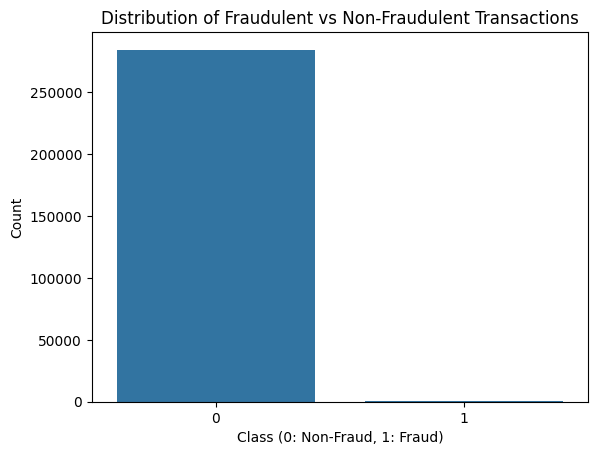

Class
0    284315
1       492
Name: count, dtype: int64

Percentage of fraudulent transactions: 0.1727 %


In [7]:
sns.countplot(data=df, x='Class')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

# Exact numbers
fraud_count = df['Class'].value_counts()
print(fraud_count)
print("\nPercentage of fraudulent transactions:", round((fraud_count[1] / fraud_count.sum()) * 100, 4), "%")


In [8]:
df.describe()
#This helps you understand the range, mean, and distribution of Time, Amount, and PCA features.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Correlation analysis helps us understand the relationship between two variables.
It shows how strongly and in what direction one variable influences another.

The dataset has features like:
V1 to V28: These are principal components from PCA (uninterpretable directly but mathematically meaningful).

Amount, Time: Real-world features.

Class: Target (0 = not fraud, 1 = fraud)

We want to find:

Which features are most correlated with Class (fraud or not)? Basically which features might be affecting the class the most higher correlation tells that the column might be affecting the class (fraud or not) the most and in what direction.

In [9]:
# Compute correlation matrix
corr_matrix = df.corr()

# Correlation with the target
correlation_with_class = corr_matrix["Class"].sort_values(ascending=False)
print("Top correlations with Class:\n")
print(correlation_with_class.head(10))  # Top positively correlated features
print("\nLowest correlations with Class:\n")
print(correlation_with_class.tail(10))  # Top negatively correlated features


Top correlations with Class:

Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Lowest correlations with Class:

V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


5.1 Handling class imbalance
In the credit card dataset:

Class 0 (Not Fraud) → ~99.8%

Class 1 (Fraud) → ~0.2%

This huge imbalance can make your model biased toward predicting only the majority class (i.e., "Not Fraud") and still achieve high accuracy — but it will fail at detecting actual frauds, which is our true goal.
Common Techniques to Handle Imbalance
We’ll use Random UnderSampling for now (simple and effective for small projects):


Class
0    284315
1       492
Name: count, dtype: int64


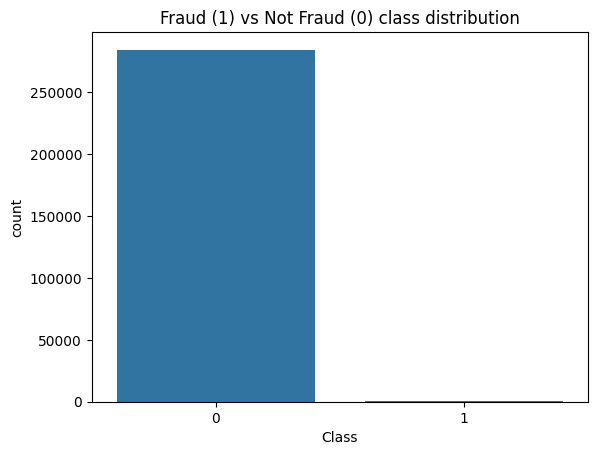

In [10]:
#Let's Check the Imbalance First

#count of each class
print(df['Class'].value_counts())

#plot the imbalance
sns.countplot(data=df, x='Class')
plt.title("Fraud (1) vs Not Fraud (0) class distribution")
plt.show()

✂️ Random UnderSampling (RUS)
Reduces majority class (Class 0) to match minority class (Class 1)

Risk: May lose some useful data, but works for baseline models

Class
1    492
0    492
Name: count, dtype: int64


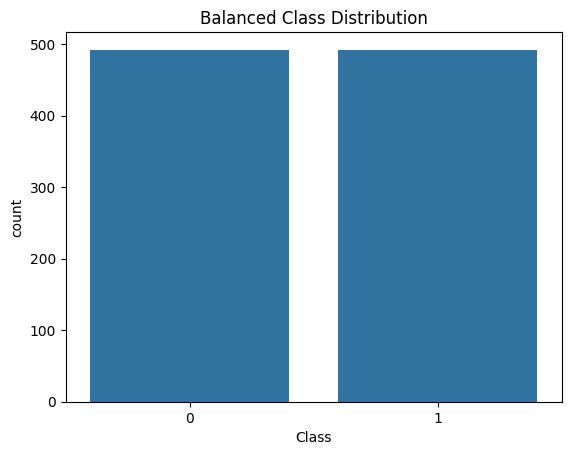

In [13]:
from sklearn.utils import resample
#separate minority and majority class
df_majority=df[df.Class==0]
df_minority=df[df.Class==1]
#downsample majority class
df_majority_downsampled= resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)
                                  #to be resample            #match minority
#combine minority and downsampled majority
df_balanced=pd.concat([df_majority_downsampled,df_minority])

#shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

#check new class distribution
print(df_balanced['Class'].value_counts())

#visualize
sns.countplot(data=df_balanced, x='Class')
plt.title("Balanced Class Distribution")
plt.show()

So we have successfully handled the  imbalance of the  data

5.2 FEATURE SCALING
In our dataset:

The Time and Amount columns have much larger scales compared to the V1–V28 features, which are already scaled via PCA.

If we don't scale Time and Amount, the model may give disproportionate importance to them.

We'll use StandardScaler from sklearn.preprocessing, which:

Centers the data (mean = 0)

Scales the data (standard deviation = 1)



In [16]:
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Copy dataset before scaling
scaled_df = df_balanced.copy()

# Apply scaling to 'Time' and 'Amount'
scaled_df[['Time', 'Amount']] = scaler.fit_transform(scaled_df[['Time', 'Amount']])

# Confirm changes
scaled_df[['Time', 'Amount']].describe()


,Time,Amount
count,9.840000e+02,9.840000e+02
mean,7.762535e-17,-2.707861e-18
std,1.000509e+00,1.000509e+00
min,-1.824027e+00,-4.569321e-01
25%,-8.750069e-01,-4.516085e-01
50%,-1.469078e-01,-3.807767e-01
75%,9.720871e-01,-5.819205e-03
max,1.751549e+00,9.134102e+00


Only Time and Amount are scaled — PCA components V1 to V28 are already scaled.

Data is now fully ready for model training.
Checkpoint Summary So Far:

✅ Loaded the dataset

✅ Understood data and correlations

✅ Handled class imbalance with under-sampling

✅ Scaled important numerical features

6.1 SPLITTING THE DATA FOR TRAINING AND TESTING


In [ ]:
from sklearn.model_selection import train_test_split
# Separate features (X) and true labels (y)

X=scaled_df.drop('Class',axis=1)
y=scaled_df['Class']
#perform the split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print(f"Training set: {X_train.shape}, Training labels: {y_train.shape}")
print(f"Testing set: {X_test.shape}, Testing labels: {y_test.shape}")
#When stratify is set to the target variable y, train_test_split will ensure that the 
#percentage of each class in the training set and the testing set is approximately the same as in the original dataset.

Training set: (787, 30), Training labels: (787,)
Testing set: (197, 30), Testing labels: (197,)
